In [3]:
import pandas as pd
file_path = '~/data/data/bike-sharing-demand/train.csv'
train = pd.read_csv(file_path)

In [4]:
print(train.head())

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


In [5]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [6]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

In [7]:
print(train)

                 datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  year  month  \
0      14.395        81     0.000

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

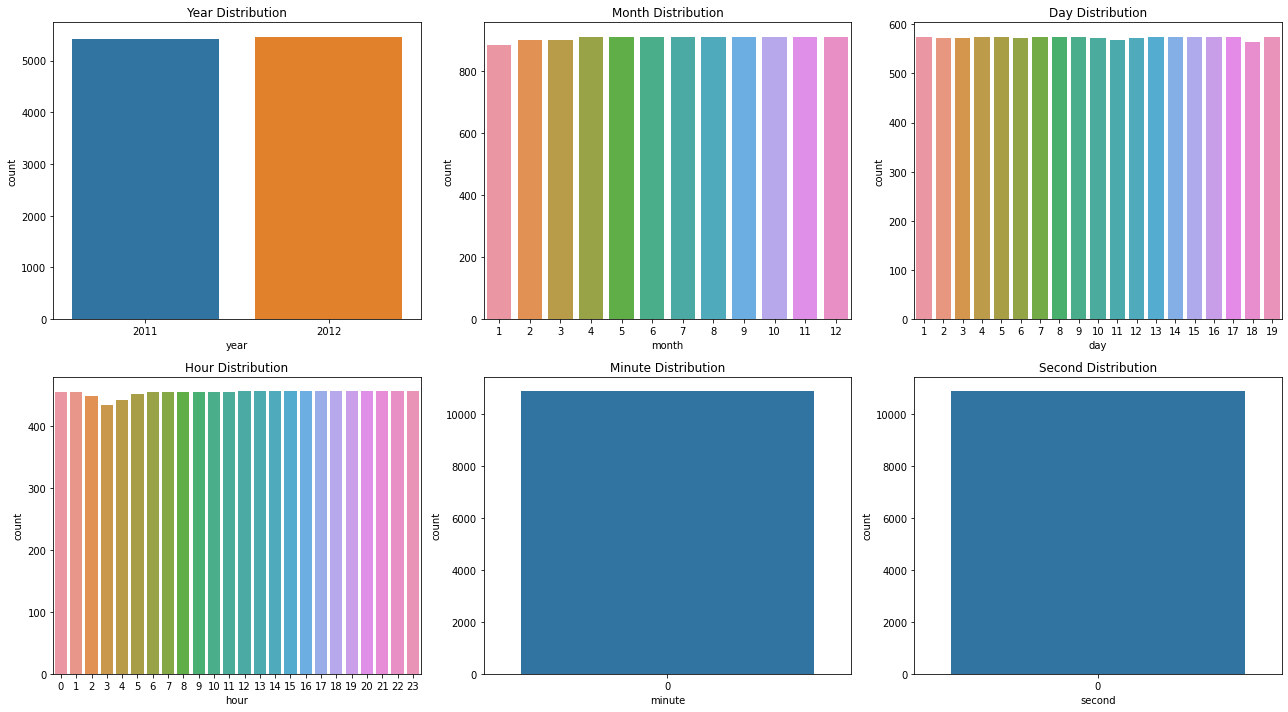

In [10]:
# 그래프 사이즈와 서브플롯 설정
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 연도 시각화
sns.countplot(data=train, x='year', ax=axes[0, 0])
axes[0, 0].set_title('Year Distribution')

# 월 시각화
sns.countplot(data=train, x='month', ax=axes[0, 1])
axes[0, 1].set_title('Month Distribution')

# 일 시각화
sns.countplot(data=train, x='day', ax=axes[0, 2])
axes[0, 2].set_title('Day Distribution')

# 시각화
sns.countplot(data=train, x='hour', ax=axes[1, 0])
axes[1, 0].set_title('Hour Distribution')

# 분 시각화
sns.countplot(data=train, x='minute', ax=axes[1, 1])
axes[1, 1].set_title('Minute Distribution')

# 초 시각화
sns.countplot(data=train, x='second', ax=axes[1, 2])
axes[1, 2].set_title('Second Distribution')

# 레이아웃 조정
plt.tight_layout()
plt.show()

In [11]:
X = train[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour']]
y = train['count']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print(X_train.shape)
print(y_train.shape)

(8708, 12)
(8708,)


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [26]:
model = LinearRegression()

In [27]:
model.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = model.predict(X_test)

In [34]:
results = X_test.copy()
results['count'] = y_test
results['predicted_count'] = y_pred

In [35]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # RMSE는 MSE의 제곱근


In [36]:
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Squared Error (MSE): 19945.3701
Root Mean Squared Error (RMSE): 141.2281


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

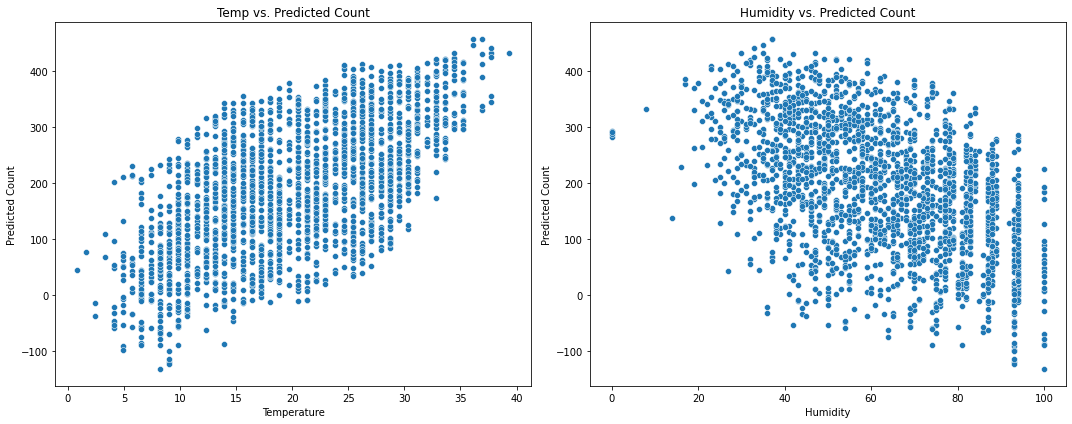

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(data=results, x='temp', y='predicted_count', ax=axes[0])
axes[0].set_title('Temp vs. Predicted Count')
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Predicted Count')

sns.scatterplot(data=results, x='humidity', y='predicted_count', ax=axes[1])
axes[1].set_title('Humidity vs. Predicted Count')
axes[1].set_xlabel('Humidity')
axes[1].set_ylabel('Predicted Count')

plt.tight_layout()
plt.show()